<a href="https://colab.research.google.com/github/araujoroberts/Proyectos/blob/main/Solucion_de_la_ecuaci%C3%B3n_del_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucition of heat equation by using the finite-differences method
The 1D heat equation is given by
$$
\frac{\partial u}{\partial t}=\alpha\frac{\partial^2u}{\partial x^2}
$$
We're going to solve it by introducing the operators:

$$
\frac{\partial u}{\partial t}\approx \frac{u(x,t+dt)-u(x,t)}{dt}
$$

$$
\frac{\partial^2 u}{\partial x^2}\approx \frac{u(x+dx,t)-2u(x,t)+u(x-dx,t)}{dx^2}
$$

The first one represent the forward finite difference, while the second one represent the centered finite difference.

Now, let's put this in code notation, where "$i$" will represent the time index and "$k$" will represent the spatial index.

$$
\frac{\partial u}{\partial t}\approx \frac{u^{i+1}_k-u^i_k}{dt}
$$

And

$$
\frac{\partial^2 u}{\partial x^2}\approx \frac{u^i_{k+1}-2u^i_k+u^i_{k-1}}{dx^2}
$$

Substituting this in head equations:

$$
\frac{u^{i+1}_k-u^i_k}{dt}=\alpha \frac{u^i_{k+1}-2u^i_k+u^i_{k-1}}{dx^2}
$$

Solving for $u^{i+1}_k$:

$$
u^{i+1}_k= \alpha \frac{dt}{dx^2} ( u^i_{k+1}-2u^i_k+u^i_{k-1} )+u^i_k
$$

And this is the equation we are interested in solving

# Stability criterion
for our equation to converge we need that the following criterion is fulfill:

$$
dt<\frac{dx^2}{2\alpha}
$$

Thus, we must choose very well our scheme in order to assure the convergence

In [69]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# First let's define our simulation parameters
l=1.0
alpha=0.1

# Discretizing
n=5
x=np.linspace(0,l,n)
dx=l/(n-1)

# Initial conditions
t=0.
uinit=1000.
u=np.ones(n)*uinit

# Boundary conditions
u0=25. 
ul=100.
# The one above aplied to our temperature vector
u[0]=u0
u[-1]=ul
print("The initial temperature vector is" +str(u))

The initial temperature vector is[  25. 1000. 1000. 1000.  100.]


In [71]:
# Stability criterion
dt_stable=dx**2/(2*alpha)
print(dt_stable)

0.3125


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-72-381a62c8f13c>", line 36, in actualizar
    plt.title(str(round(usol[i],5)))
TypeError: type numpy.ndarray doesn't define __round__ method


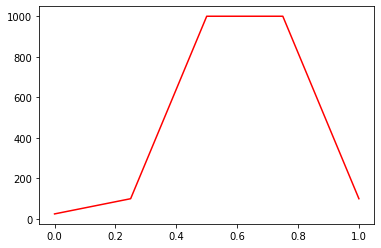

In [72]:
# Setting up the dt stable
dt=0.1

# Solution over time
t_end=20.

# Let's define another temperature vector which is in charge of save the temperatures in the next step of the simulation
udt=u.copy()

# Now let's define the vector which is in charge of saving the temperatures vectors at each time step
# At this point these are acting as initial conditions
usol=[u]
tsol=[t]

while t<=t_end:
  for i in range (n-1):
    if i==0:
      u[i]=u0
    elif i==l:
      u[i]=ul
    else:
      udt[i]=alpha*dt/(dx**2)*(u[i+1]-2*u[i]+u[i-1])+u[i]
  u=udt.copy()
  t=t+dt
  usol.append(udt)
  tsol.append(t)

# Animation
import matplotlib.animation as animation
fig=plt.figure()
ax=plt.gca()

def actualizar(i):
  ax.clear()
  plt.plot(x,usol[i],'r')
  plt.title(str(round(usol[i],5)))
  plt.xlim(0,l)
  plt.ylim=(0,1000)

ani=animation.FuncAnimation(fig,actualizar,range(len(usol)))
plt.show()


In [ ]:
#